In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [168]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras import layers
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2
# from keras.layers import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,load_model
from keras.layers import Input, Dense, Add,Activation, AveragePooling2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, ZeroPadding2D
from keras.utils import to_categorical
from keras.initializers import glorot_uniform
from keras import regularizers
import scipy.misc
from sklearn.model_selection import train_test_split
from numpy import argmax


In [169]:
root_directory="/content/drive/MyDrive/DATASETS/"
# survival_words_directory="/content/drive/MyDrive/DATASETS/25_survival_words/"
alphabets_directory="/content/drive/MyDrive/DATASETS/ALPHABETS/"
numbers_directory="/content/drive/MyDrive/DATASETS/NUMBERS/"

In [170]:
k=0

In [171]:
def load_dataset(directory,k):
  images=[]
  labels=[]
  for idx,label in enumerate(uniq_labels):
    for file in os.listdir(directory + label):
      filepath = directory + label +"/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(k)
    k+=1
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels,k

In [172]:
# uniq_labels=sorted(os.listdir(alphabets_directory))
# print(uniq_labels)

In [173]:
uniq_labels=sorted(os.listdir(numbers_directory))
X_numbers_directory,y_numbers_directory,k=load_dataset(numbers_directory,k)

In [174]:
# /content/drive/MyDrive/DATASETS/NUMBERS

In [175]:
y_numbers_directory


array([0, 0, 0, ..., 9, 9, 9])

In [176]:
uniq_labels=sorted(os.listdir(alphabets_directory))
X_alphabets_directory,y_alphabets_directory,k=load_dataset(alphabets_directory,k)

In [177]:
y_alphabets_directory

array([10, 10, 10, ..., 34, 34, 34])

In [178]:
# uniq_labels=sorted(os.listdir(survival_words_directory))
# X_survival_words_directory,y_survival_words_directory,k=load_dataset(survival_words_directory,k)

In [179]:
# y_survival_words_directory

In [180]:
X=[]
y=[]

In [181]:
X=np.concatenate((X_numbers_directory,X_alphabets_directory))

In [182]:
# X=np.concatenate((X,X_survival_words_directory))

In [183]:
y=np.concatenate((y_numbers_directory,y_alphabets_directory))

In [184]:
# y=np.concatenate((y,y_survival_words_directory))

In [185]:
y

array([ 0,  0,  0, ..., 34, 34, 34])

In [186]:
# list(y.keys())
y = to_categorical(y)


In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [188]:
X_train = X_train / 255.
X_test = X_test/ 255.

In [189]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50,3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(y.shape[1], activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)        

In [190]:
y.shape

(11025, 35)

In [191]:
np.unique(y)

array([0., 1.], dtype=float32)

In [192]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [193]:
history = model.fit(X_train, Y_train, batch_size=10, epochs=10)

Epoch 1/10
882/882 [==============================] - 5s 5ms/step - loss: 0.9253 - accuracy: 0.7514
Epoch 2/10
882/882 [==============================] - 3s 3ms/step - loss: 0.0707 - accuracy: 0.9791
Epoch 3/10
882/882 [==============================] - 3s 4ms/step - loss: 0.0348 - accuracy: 0.9882
Epoch 4/10
882/882 [==============================] - 3s 4ms/step - loss: 0.0297 - accuracy: 0.9908
Epoch 5/10
882/882 [==============================] - 3s 4ms/step - loss: 0.0197 - accuracy: 0.9940
Epoch 6/10
882/882 [==============================] - 3s 3ms/step - loss: 0.0159 - accuracy: 0.9942
Epoch 7/10
882/882 [==============================] - 3s 3ms/step - loss: 0.0218 - accuracy: 0.9944
Epoch 8/10
882/882 [==============================] - 3s 3ms/step - loss: 0.0135 - accuracy: 0.9965
Epoch 9/10
882/882 [==============================] - 3s 4ms/step - loss: 0.0162 - accuracy: 0.9946
Epoch 10/10
882/882 [==============================] - 3s 4ms/step - loss: 0.0125 - accuracy: 0.9963

In [194]:
history.history??

In [195]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [196]:
import matplotlib.pyplot as plt

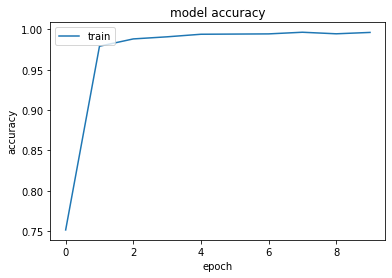

In [197]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history[''])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

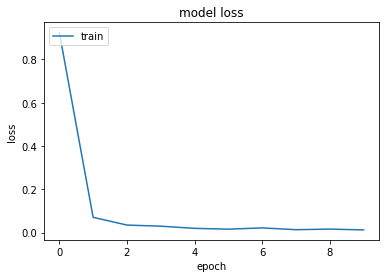

In [198]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [199]:
model.evaluate(X_test,Y_test,batch_size=10)

221/221 [==============================] - 1s 3ms/step - loss: 0.0052 - accuracy: 0.9968


[0.005227705929428339, 0.9968253970146179]

In [200]:
y_pred = model.predict(X_test)

69/69 [==============================] - 0s 3ms/step


In [201]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred.round())*100

99.68253968253968

In [202]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [203]:
y_check=np.argmax(y_pred,axis=1)

In [204]:
y_check

array([ 1, 33, 30, ..., 14, 33, 22])

In [205]:
Y_testing=np.argmax(Y_test,axis=1)

In [206]:
Y_testing

array([ 1, 33, 30, ..., 14, 33, 22])

In [207]:
confusion_matrix(Y_testing, y_check)

array([[56,  0,  0, ...,  0,  0,  0],
       [ 0, 54,  0, ...,  0,  0,  0],
       [ 0,  0, 66, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 70,  0,  0],
       [ 0,  0,  0, ...,  0, 53,  0],
       [ 0,  0,  0, ...,  0,  0, 50]])

In [208]:
# confusion_matrix = confusion_matrix(Y_testing, y_check)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

In [209]:
# cm_display.plot()
# plt.show()

In [210]:
print(classification_report(y_pred.round(), Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        66
           3       1.00      0.99      0.99        68
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        81
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        61
           9       1.00      1.00      1.00        71
          10       1.00      1.00      1.00        81
          11       1.00      1.00      1.00        68
          12       1.00      1.00      1.00        78
          13       1.00      1.00      1.00        37
          14       1.00      1.00      1.00        55
          15       1.00      1.00      1.00        64
          16       1.00      1.00      1.00        61
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
accuracy = model.evaluate(X_test,Y_test,batch_size=138)
print("Accuracy: ",accuracy[1]*100)

16/16 [==============================] - 0s 16ms/step - loss: 0.0052 - accuracy: 0.9968
Accuracy:  99.68253970146179


In [212]:
# model.save_weights('/content/drive/MyDrive/Freelance/NomanRafique/')
model.save('my_model.h5') 


In [213]:
model.save('/content/drive/MyDrive/my_model.h5') 